In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("final_startup_dataset_v2.csv")
df.head()

,name,category_list,funding_total_usd,country_code,state_code,founded_at,funding_rounds,first_funding_at,last_funding_at,status
0,1 Mainstream,"['Apps', 'Cable', 'Distribution', 'Software']",5000000,USA,CA,2012-03-01,1,2015-03-17,2015-03-17,acquired
1,1000 Markets,"['Art', 'E-Commerce', 'Marketplaces']",500000,USA,WA,2009-01-01,1,2009-05-15,2009-05-15,acquired
2,1000memories,['Curated Web'],2535000,USA,CA,2010-07-01,2,2010-01-01,2011-02-16,acquired
3,100Plus,['Analytics'],1250000,USA,CA,2011-09-16,2,2011-11-02,2011-11-30,acquired
4,1010data,['Software'],35000000,USA,NY,2000-01-01,1,2010-03-08,2010-03-08,acquired


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13959 entries, 0 to 13958
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               13958 non-null  object
 1   category_list      12873 non-null  object
 2   funding_total_usd  13959 non-null  object
 3   country_code       11968 non-null  object
 4   state_code         11750 non-null  object
 5   founded_at         10227 non-null  object
 6   funding_rounds     13959 non-null  int64 
 7   first_funding_at   13957 non-null  object
 8   last_funding_at    13959 non-null  object
 9   status             13959 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.1+ MB


In [4]:
df.isna().sum()

name                    1
category_list        1086
funding_total_usd       0
country_code         1991
state_code           2209
founded_at           3732
funding_rounds          0
first_funding_at        2
last_funding_at         0
status                  0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isna().sum()

name                 0
category_list        0
funding_total_usd    0
country_code         0
state_code           0
founded_at           0
funding_rounds       0
first_funding_at     0
last_funding_at      0
status               0
dtype: int64

In [7]:
df.shape

(8940, 10)

In [8]:
import ast
df["category_list"] = df["category_list"].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else [])
categories = df["category_list"].explode()
category_counts = categories.value_counts()
categories_to_keep = category_counts[category_counts >= 200].index.tolist()
for category in categories_to_keep:
    df[category] = df["category_list"].apply(lambda x: 1 if category in x else 0)
df.drop(columns=["category_list"], inplace=True)

In [9]:
df.head()

,name,funding_total_usd,country_code,state_code,founded_at,funding_rounds,first_funding_at,last_funding_at,status,Software,...,Social Media,Games,Health Care,Analytics,Finance,Internet,Security,Hardware + Software,SaaS,Technology
0,1 Mainstream,5000000,USA,CA,2012-03-01,1,2015-03-17,2015-03-17,acquired,1,...,0,0,0,0,0,0,0,0,0,0
1,1000 Markets,500000,USA,WA,2009-01-01,1,2009-05-15,2009-05-15,acquired,0,...,0,0,0,0,0,0,0,0,0,0
2,1000memories,2535000,USA,CA,2010-07-01,2,2010-01-01,2011-02-16,acquired,0,...,0,0,0,0,0,0,0,0,0,0
3,100Plus,1250000,USA,CA,2011-09-16,2,2011-11-02,2011-11-30,acquired,0,...,0,0,0,1,0,0,0,0,0,0
4,1010data,35000000,USA,NY,2000-01-01,1,2010-03-08,2010-03-08,acquired,1,...,0,0,0,0,0,0,0,0,0,0


In [10]:
df.shape

(8940, 26)

In [11]:
df['Software'].value_counts()

Software
0    7344
1    1596
Name: count, dtype: int64

In [12]:
df['Games'].value_counts()

Games
0    8493
1     447
Name: count, dtype: int64

In [13]:
import pandas as pd

# Convert columns to datetime with the specific format 'DD-MM-YYYY'
df['founded_at'] = pd.to_datetime(df['founded_at'], format='%Y-%m-%d', errors='coerce')
df['first_funding_at'] = pd.to_datetime(df['first_funding_at'], format='%Y-%m-%d', errors='coerce')
df['last_funding_at'] = pd.to_datetime(df['last_funding_at'], format='%Y-%m-%d', errors='coerce')

# Calculate the age at first funding (difference between first funding date and founding date)
df['age_at_first_funding'] = (df['first_funding_at'] - df['founded_at']).dt.days // 365

# Calculate the age at last funding (difference between last funding date and founding date)
df['age_at_last_funding'] = (df['last_funding_at'] - df['founded_at']).dt.days // 365

df.head()


,name,funding_total_usd,country_code,state_code,founded_at,funding_rounds,first_funding_at,last_funding_at,status,Software,...,Health Care,Analytics,Finance,Internet,Security,Hardware + Software,SaaS,Technology,age_at_first_funding,age_at_last_funding
0,1 Mainstream,5000000,USA,CA,2012-03-01,1,2015-03-17,2015-03-17,acquired,1,...,0,0,0,0,0,0,0,0,3,3
1,1000 Markets,500000,USA,WA,2009-01-01,1,2009-05-15,2009-05-15,acquired,0,...,0,0,0,0,0,0,0,0,0,0
2,1000memories,2535000,USA,CA,2010-07-01,2,2010-01-01,2011-02-16,acquired,0,...,0,0,0,0,0,0,0,0,-1,0
3,100Plus,1250000,USA,CA,2011-09-16,2,2011-11-02,2011-11-30,acquired,0,...,0,1,0,0,0,0,0,0,0,0
4,1010data,35000000,USA,NY,2000-01-01,1,2010-03-08,2010-03-08,acquired,1,...,0,0,0,0,0,0,0,0,10,10


In [14]:
df.shape

(8940, 28)

In [15]:
df[df["age_at_first_funding"] < 0].shape[0]

666

In [16]:
df[df["age_at_last_funding"] < 0].shape[0]

327

In [17]:
df = df[df["age_at_first_funding"] >= 0]
df = df[df["age_at_first_funding"] >= 0]

In [18]:
df.shape

(8274, 28)

In [19]:
#df.to_csv("final_startup_dataset_v3.csv", index=False)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8274 entries, 0 to 13958
Data columns (total 28 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   name                  8274 non-null   object        
 1   funding_total_usd     8274 non-null   object        
 2   country_code          8274 non-null   object        
 3   state_code            8274 non-null   object        
 4   founded_at            8274 non-null   datetime64[ns]
 5   funding_rounds        8274 non-null   int64         
 6   first_funding_at      8274 non-null   datetime64[ns]
 7   last_funding_at       8274 non-null   datetime64[ns]
 8   status                8274 non-null   object        
 9   Software              8274 non-null   int64         
 10  Mobile                8274 non-null   int64         
 11  Curated Web           8274 non-null   int64         
 12  Biotechnology         8274 non-null   int64         
 13  Advertising           

In [21]:
df.drop(columns=["founded_at", "first_funding_at", "last_funding_at"], inplace=True)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8274 entries, 0 to 13958
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   name                  8274 non-null   object
 1   funding_total_usd     8274 non-null   object
 2   country_code          8274 non-null   object
 3   state_code            8274 non-null   object
 4   funding_rounds        8274 non-null   int64 
 5   status                8274 non-null   object
 6   Software              8274 non-null   int64 
 7   Mobile                8274 non-null   int64 
 8   Curated Web           8274 non-null   int64 
 9   Biotechnology         8274 non-null   int64 
 10  Advertising           8274 non-null   int64 
 11  E-Commerce            8274 non-null   int64 
 12  Enterprise Software   8274 non-null   int64 
 13  Social Media          8274 non-null   int64 
 14  Games                 8274 non-null   int64 
 15  Health Care           8274 non-null   int6

In [23]:
dash_count = (df['funding_total_usd'] == '-').sum()
print(dash_count)

838


In [24]:
import numpy as np
closed_median = df[df['status'] == 'closed']['funding_total_usd'].replace('-', np.nan).dropna().astype(float).median()
acquired_ipo_median = df[df['status'].isin(['acquired', 'ipo'])]['funding_total_usd'].replace('-', np.nan).dropna().astype(float).median()

filled_funding = []
for index, row in df.iterrows():
    if row['funding_total_usd'] == '-':
        if row['status'] == 'closed':
            filled_funding.append(closed_median)
        elif row['status'] in ['acquired', 'ipo']:
            filled_funding.append(acquired_ipo_median)
    else:
        try:
            filled_funding.append(float(row['funding_total_usd'].replace(',', '')))
        except ValueError:
            filled_funding.append(np.nan)

df['funding_total_usd'] = filled_funding

# Ensure the column is of type float
df['funding_total_usd'] = df['funding_total_usd'].astype(float)

In [25]:
df.head()

,name,funding_total_usd,country_code,state_code,funding_rounds,status,Software,Mobile,Curated Web,Biotechnology,...,Health Care,Analytics,Finance,Internet,Security,Hardware + Software,SaaS,Technology,age_at_first_funding,age_at_last_funding
0,1 Mainstream,5000000.0,USA,CA,1,acquired,1,0,0,0,...,0,0,0,0,0,0,0,0,3,3
1,1000 Markets,500000.0,USA,WA,1,acquired,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,100Plus,1250000.0,USA,CA,2,acquired,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4,1010data,35000000.0,USA,NY,1,acquired,1,0,0,0,...,0,0,0,0,0,0,0,0,10,10
5,10BestThings,50000.0,USA,OH,1,closed,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
dash_count = (df['funding_total_usd'] == '-').sum()
print(dash_count)

0


In [27]:
from sklearn.preprocessing import LabelEncoder
df = df.drop('name', axis=1)
df['funding_total_usd'] = df['funding_total_usd'].astype(float)


country_encoders = {}
state_encoders = {}
le_country = LabelEncoder()
df['country_code'] = le_country.fit_transform(df['country_code'])
country_encoders['country_code'] = le_country

le_state = LabelEncoder()
df['state_code'] = le_state.fit_transform(df['state_code'])
state_encoders['state_code'] = le_state

In [28]:
df['status'] = df['status'].apply(lambda x: 'success' if x in ['acquired', 'ipo'] else 'fail')

In [29]:
df['status'].value_counts()

status
success    5355
fail       2919
Name: count, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=["status"]), df["status"], test_size=0.2, random_state=42, stratify=df["status"])

In [48]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

rf_model = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)

# Train the model using the training data
rf_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = rf_model.predict(X_test)

# Evaluate the model performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy of Random Forest model (test): {accuracy_test:.2f}")

# Predict on the training set
y_pred_train = rf_model.predict(X_train)

# Evaluate the model performance on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Accuracy of Random Forest model (train): {accuracy_train:.2f}")


Accuracy of Random Forest model (test): 0.79
Accuracy of Random Forest model (train): 0.82


In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Create a Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42, max_depth=10)

# Train the model using the training data
dt_model.fit(X_train, y_train)

# Predict on the test set
y_pred_test = dt_model.predict(X_test)

# Evaluate the model performance on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy of Decision Tree model (test): {accuracy_test:.2f}")

# Predict on the training set
y_pred_train = dt_model.predict(X_train)

# Evaluate the model performance on the training set
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Accuracy of Decision Tree model (train): {accuracy_train:.2f}")

Accuracy of Decision Tree model (test): 0.77
Accuracy of Decision Tree model (train): 0.83


In [33]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6619 entries, 5253 to 11924
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   funding_total_usd     6619 non-null   float64
 1   country_code          6619 non-null   int32  
 2   state_code            6619 non-null   int32  
 3   funding_rounds        6619 non-null   int64  
 4   Software              6619 non-null   int64  
 5   Mobile                6619 non-null   int64  
 6   Curated Web           6619 non-null   int64  
 7   Biotechnology         6619 non-null   int64  
 8   Advertising           6619 non-null   int64  
 9   E-Commerce            6619 non-null   int64  
 10  Enterprise Software   6619 non-null   int64  
 11  Social Media          6619 non-null   int64  
 12  Games                 6619 non-null   int64  
 13  Health Care           6619 non-null   int64  
 14  Analytics             6619 non-null   int64  
 15  Finance               

In [34]:
X_train.isna().sum()

funding_total_usd       0
country_code            0
state_code              0
funding_rounds          0
Software                0
Mobile                  0
Curated Web             0
Biotechnology           0
Advertising             0
E-Commerce              0
Enterprise Software     0
Social Media            0
Games                   0
Health Care             0
Analytics               0
Finance                 0
Internet                0
Security                0
Hardware + Software     0
SaaS                    0
Technology              0
age_at_first_funding    0
age_at_last_funding     0
dtype: int64

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

# 5. Scale the features (important for KNN)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# 6. Create and train the KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust n_neighbors
knn_model.fit(X_train_scaled, y_train)

# 7. Make predictions on the test set
y_pred_test = knn_model.predict(X_test_scaled)

# 8. Evaluate the model performance
accuracy_test = accuracy_score(y_test, y_pred_test)

print(f"Accuracy of KNN model (test): {accuracy_test:.2f}")

# 9. Make predictions on the training set
y_pred_train = knn_model.predict(X_train_scaled)

#10. Evaluate the model performance on the training set.
accuracy_train = accuracy_score(y_train, y_pred_train)

print(f"Accuracy of KNN model (train): {accuracy_train:.2f}")

Accuracy of KNN model (test): 0.70
Accuracy of KNN model (train): 0.79


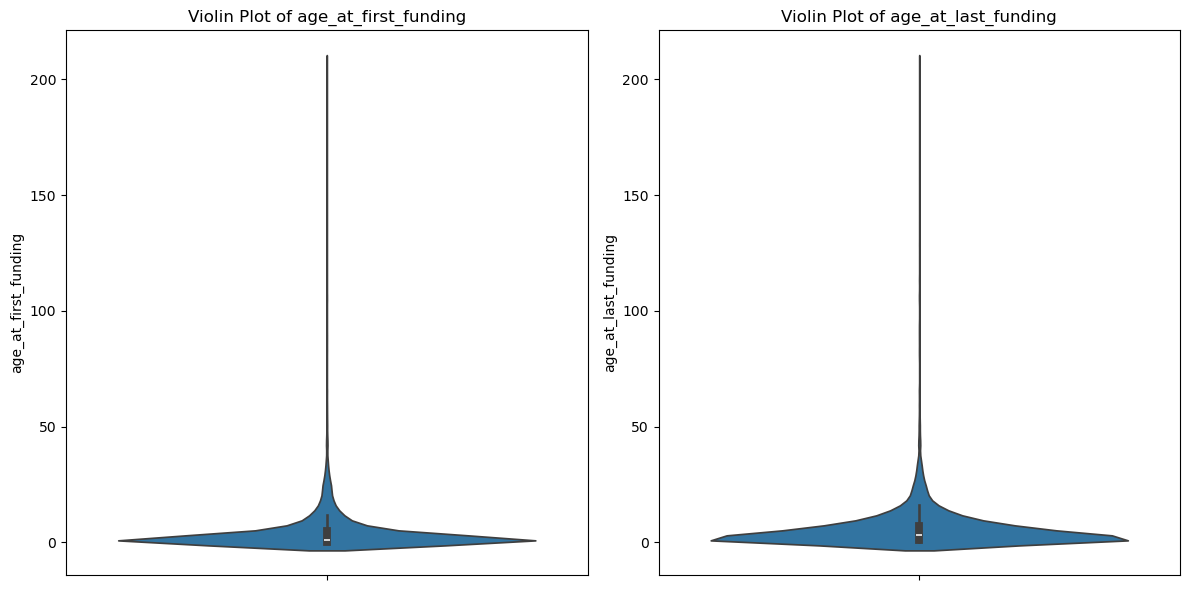

In [49]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named 'df' and has columns 'age_at_first_funding' and 'age_at_last_funding'

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.violinplot(y=df['age_at_first_funding'])
plt.title('Violin Plot of age_at_first_funding')

plt.subplot(1, 2, 2)
sns.violinplot(y=df['age_at_last_funding'])
plt.title('Violin Plot of age_at_last_funding')

plt.tight_layout()
plt.show()

In [52]:
df['age_at_first_funding'].mean()

4.546289581822577